source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 Volume in drive C is Windows
 Volume Serial Number is 5EBE-CD33

 Directory of C:\Users\kerrs\Desktop

09/23/2019  03:52 PM    <DIR>          .
09/23/2019  03:52 PM    <DIR>          ..
09/21/2019  04:22 PM    <DIR>          .ipynb_checkpoints
09/23/2019  09:44 AM            12,248 11Sept_exercises-clean.ipynb
09/22/2019  03:06 PM            20,651 16Sept_Practice_Problems-clean.ipynb
09/20/2019  08:44 PM            28,780 16Sept_Practice_Problems-solved.ipynb
09/18/2019  11:13 AM    <DIR>          2016-new-coder-survey-
09/01/2019  07:33 PM         2,746,416 Blockchain Revolution ( PDFDrive.com ).pdf
08/06/2019  05:56 PM         3,942,436 bookmarks.html
09/22/2019  04:24 PM           189,032 Cannabis_Stocks.PNG
08/06/2019  06:10 PM    <DIR>          Data
09/23/2019  03:48 PM    <DIR>          Data-files
08/25/2019  02:41 PM         3,036,296 definitive-guide-to-marketing-metrics-marketing-analytics.pdf
09/16/2019  11:27 AM             3,067 Dictionary_Exercises.txt
09/17/2019  09:15 

In [2]:
df = pd.read_csv(r"C:\Users\kerrs\Desktop\Data-files\dataframe.csv")
df_all_timestamps = pd.read_csv(r"C:\Users\kerrs\Desktop\Data-files\dataframe_all_timestamps.csv")

In [3]:
import numpy as np

df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [4]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [6]:
import pandasql as ps

In [7]:
pysqldf = lambda q: sqldf(q, globals())

In [90]:
q1 = "SELECT * FROM df WHERE tags LIKE '%League of Legends%';"
LoL = ps.sqldf(q1,locals())
LoL.shape

(79, 24)

In [84]:
q2 = "SELECT * FROM df WHERE tags LIKE '%Hearthstone%';"
Hearth = ps.sqldf(q2,locals())
Hearth.shape

(10, 24)

In [91]:
q3 = "SELECT * FROM df WHERE tags LIKE '%Dota2%';"
Dota2 = ps.sqldf(q3,locals())
Dota2.shape

(31, 24)

In [92]:
q4 = "SELECT * FROM df WHERE tags LIKE '%Counter-Strike%';"
CS = ps.sqldf(q4,locals())
CS.shape

(14, 24)

In [57]:
q5 = "SELECT * FROM df WHERE tags LIKE '%OverWatch%';"
OW = ps.sqldf(q5a, locals())

(31, 24)

In [118]:
LoL['game'] = 'LoL'

LoL.shape

Dota2['game'] = 'Dota2'

CS['game'] = 'CS'

Hearth['game'] = 'Hearth'
OW['game'] = 'OW'

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp


,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp


(30, 24)

(161, 24)

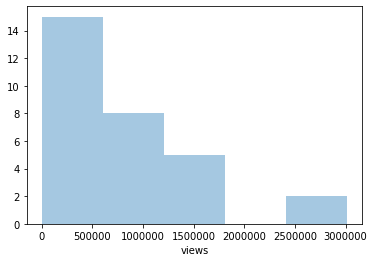

In [23]:

sns.distplot(OW["views"], kde = False)

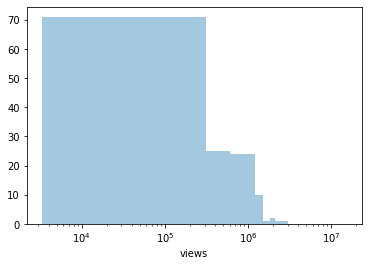

In [102]:
g = sns.distplot(OWa["views"], kde = False)
g.set_xscale("log")

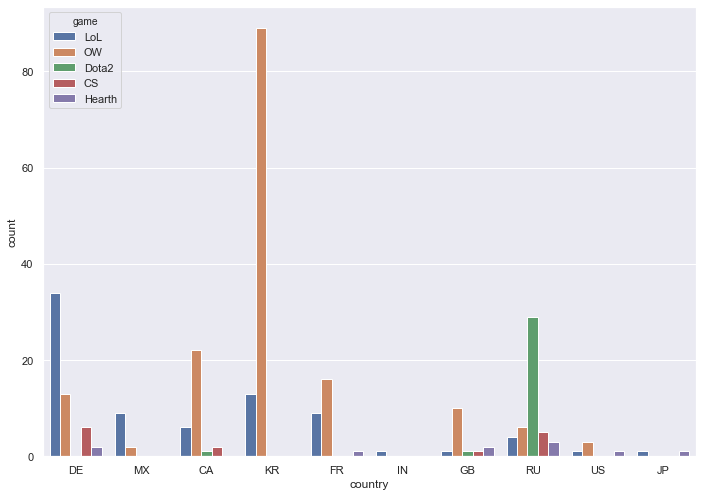

In [125]:
new = pd.concat([LoL,OWa,Dota2, CS, Hearth], axis = 0)
new.shape


sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'country', hue ='game', data = new)

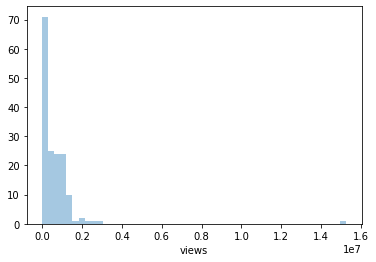

In [103]:
sns.distplot(OWa["views"], kde = False)

In [15]:
plt.figure(figsize = (10,10))
ax = 
sns.distplot(OW['views'], kde = False)

NameError: name 'OW' is not defined

<Figure size 720x720 with 0 Axes>

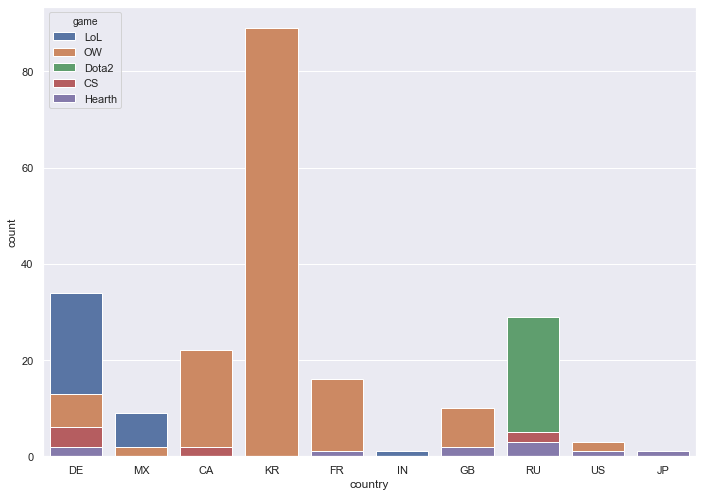

In [126]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'country', hue ='game', data = new, dodge = False)

(1, 24)

      video_id trending_date  \
0  QC9YKyu2J9Y    2018-01-26   
1  CFRpBoFeKSQ    2018-02-26   
2  4kFywSnB8ao    2018-03-26   
3  59grb198Yis    2018-03-28   
4  La3KKixHSgY    2018-04-22   
5  p1pH42zrq9A    2018-04-25   
6  aG5X7L9K15Q    2018-05-02   
7  15Rgx-B8ao0    2018-05-02   
8  KlrrfkcCMBo    2018-05-02   
9  QA-TmvSWj0o    2018-05-08   

                                               title  \
0  El vídeo PROHIBIDO de STEVEN UNIVERSE | Jamás ...   
1               Steven Universe Fan Chat con Alfrely   
2                     Ghost (Song) | Steven Universe   
3  Steven Universe | El nacimiendo de las Crystal...   
4  Steven Universe | El Pasado De Perla | Fly Me ...   
5  REVELADO! | COMO DIAMANTE ROSA ESTA VIVA! | ST...   
6  (Steven Universe Fan Animation) Your Mother An...   
7  Steven Universe | Yellow and Blue Diamond On E...   
8  (MEGA SPOILER Leaks) Bismuth, Diamonds, etc「St...   
9  Steven Universe - That Distant Shore (Latin Am...   

                              

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,log_views,log_likes,log_dislikes,log_comment_count
count,32.000000,3.200000e+01,32.00000,32.000000,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000
mean,21.000000,2.561644e+05,6889.12500,127.125000,748.968750,0.031250,0.093750,0.0,11.481795,7.572977,3.688976,5.884065
std,7.754291,4.100326e+05,10087.61293,293.835344,843.793259,0.176777,0.296145,0.0,1.424908,2.750860,1.767301,1.630090
min,1.000000,3.914000e+03,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,8.272571,0.000000,0.000000,0.000000
25%,23.000000,3.390525e+04,2475.25000,19.500000,235.000000,0.000000,0.000000,0.0,10.431342,7.807244,3.019502,5.462827
50%,24.000000,6.574100e+04,4106.50000,47.500000,389.000000,0.000000,0.000000,0.0,11.093489,8.320332,3.880234,5.966117
75%,24.000000,3.398758e+05,7454.75000,123.250000,731.750000,0.000000,0.000000,0.0,12.735226,8.915858,4.821815,6.596361
max,27.000000,1.851126e+06,55355.00000,1680.000000,3575.000000,1.000000,1.000000,0.0,14.431305,10.921540,7.427144,8.182000


0    DE
1    CA
2    GB
3    FR
4    MX
5    FR
6    DE
7    CA
8    DE
9    CA
Name: country, dtype: object

In [62]:
Fr = GOT[GOT['country'].isin(['FR'])]
Fr.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp
3,HdCPQk0jj3k,2017-12-22,J'ai pas vu Game of Thrones - Vlogmas 21,FabienOlicard,24,Entertainment,2017-12-21,05:00:00,"Game of thrones""|""comprendre""|""apprendre""|""hum...",34002,2668,59,310,https://i.ytimg.com/vi/HdCPQk0jj3k/default.jpg,0,0,0,Abonnez-vous (https://goo.gl/nXSYoz) et pensez...,FR,10.434204,7.889459,4.094345,5.739793,2017-12-21 05:00:00.000000
5,Eq6ijRAJRRs,2018-01-07,Game of Thrones saison 8 Théories et infos sur...,Captain Popcorn,24,Entertainment,2018-01-06,21:30:51,"Game of Thrones saison 8""|""Game of Thrones""|""G...",22792,5995,21,2298,https://i.ytimg.com/vi/Eq6ijRAJRRs/default.jpg,0,0,0,Game of Thrones saison 8 épisode 1 : informati...,FR,10.034209,8.698848,3.091042,7.740230,2018-01-06 21:30:51.000000
10,cE2W3-LdduU,2018-01-26,Game of Thrones saison 8 épisode 3 : théories ...,Captain Popcorn,24,Entertainment,2018-01-24,19:25:41,"Game of Thrones""|""Game of Thrones saison 8""|""W...",27181,3530,37,401,https://i.ytimg.com/vi/cE2W3-LdduU/default.jpg,0,0,0,Game of Thrones saison 8 épisode 3 : quel déro...,FR,10.210310,8.169336,3.637586,5.996452,2018-01-24 19:25:41.000000
11,8TVAc9kq5fw,2018-01-31,VLOG - شاهد معي كيف تم تصويرالمسلسل العالمي كي...,Taha Essou,22,People & Blogs,2018-01-29,19:17:49,"Game of thrones morocco""|""Khaleesi""|""ouarzazat...",50272,4792,45,592,https://i.ytimg.com/vi/8TVAc9kq5fw/default.jpg,0,0,0,FOLLOW ME ON INSTAGRAM : TAHAESSOU\n\n\nJe vou...,FR,10.825223,8.474912,3.828641,6.385194,2018-01-29 19:17:49.000000
14,7ZsLJNgRJ1o,2018-02-06,MON CASTING D'YGRID (Game of Thrones) / Maud B...,Maud Bettina-Marie,23,Comedy,2018-02-04,19:32:42,"humour""|""drole""|""gag""|""sketch""|""chanson""|""clip...",90120,7271,100,169,https://i.ytimg.com/vi/7ZsLJNgRJ1o/default.jpg,0,0,0,Je ne comprends pas pourquoi j'ai pas eu le rô...,FR,11.408908,8.891787,4.615121,5.135798,2018-02-04 19:32:42.000000


In [25]:
#All timestamps has the total sum of a day


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,log_views,log_likes,log_dislikes,log_comment_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.000000
mean,16.200000,104631.000000,4872.000000,193.300000,652.800000,0.0,0.0,0.0,10.786890,7.749199,4.160367,5.840484
std,9.715966,153993.314682,6234.641146,307.073661,950.258304,0.0,0.0,0.0,1.260353,1.269933,1.717174,1.127026
min,1.000000,8102.000000,415.000000,2.000000,80.000000,0.0,0.0,0.0,8.999990,6.030685,1.098612,4.394449
25%,10.000000,23836.750000,1058.750000,21.500000,151.000000,0.0,0.0,0.0,10.074137,6.965744,3.097099,4.932266
50%,22.000000,34802.000000,1384.000000,51.000000,345.000000,0.0,0.0,0.0,10.457338,7.233446,3.887428,5.846171
75%,24.000000,92535.500000,6441.500000,254.500000,454.250000,0.0,0.0,0.0,11.409155,8.691786,5.525612,6.118146
max,24.000000,494276.000000,16211.000000,1008.000000,3199.000000,0.0,0.0,0.0,13.110851,9.693507,6.916715,8.070906


In [ ]:
GOT['country'].head(10)

In [29]:
SU[SU['country']==['US']]

ValueError: Lengths must match to compare

      video_id trending_date  \
0  LfAZtfAqpxc    2017-11-15   
1  UrhqmMRv1gQ    2017-11-29   
2  LctCTZKdO18    2017-12-15   
3  HdCPQk0jj3k    2017-12-22   
4  siJKkohoFLg    2018-01-06   
5  Eq6ijRAJRRs    2018-01-07   
6  yuRppUasjes    2018-01-09   
7  Uj6iT_zQTk8    2018-01-15   
8  CSxaVoBXwNI    2018-01-19   
9  NkgW3SLLZgU    2018-01-25   

                                               title  \
0  Das neue Game of Thrones? Amazon plant Herr de...   
1  Rhaegar: was Jon’s father the true hero of Gam...   
2              Knightfall: The Next Game of Thrones?   
3           J'ai pas vu Game of Thrones - Vlogmas 21   
4  TRENDING 5 ENERO - JUKILOP 5M, ¿DE DÓNDE VIENE...   
5  Game of Thrones saison 8 Théories et infos sur...   
6  GAME OF THRONES: Staffel 8 erst 2019 | STAR WA...   
7  Maisie Williams Reveals Arya Stark's Game of T...   
8  Game of Thrones meets Castlevania & Wer ist ei...   
9  Jason Momoa Struggled to Book Gigs After Game ...   

                            ch

SyntaxError: invalid syntax (<ipython-input-11-5ec65156542f>, line 1)

In [5]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [75]:
qu1 = "SELECT trending_date FROM df_all_timestamps ORDER BY trending_date DESC LIMIT 20;"
print(ps.sqldf(qu1, locals()))

   trending_date
0     2018-06-14
1     2018-06-14
2     2018-06-14
3     2018-06-14
4     2018-06-14
5     2018-06-14
6     2018-06-14
7     2018-06-14
8     2018-06-14
9     2018-06-14
10    2018-06-14
11    2018-06-14
12    2018-06-14
13    2018-06-14
14    2018-06-14
15    2018-06-14
16    2018-06-14
17    2018-06-14
18    2018-06-14
19    2018-06-14


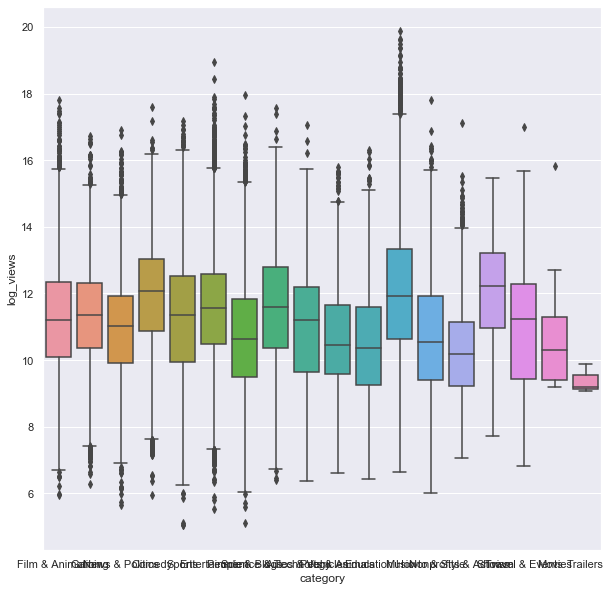

In [27]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "category", y = 'log_views', data = df)

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(y = 'language', data = SU)

ValueError: Could not interpret input 'language'

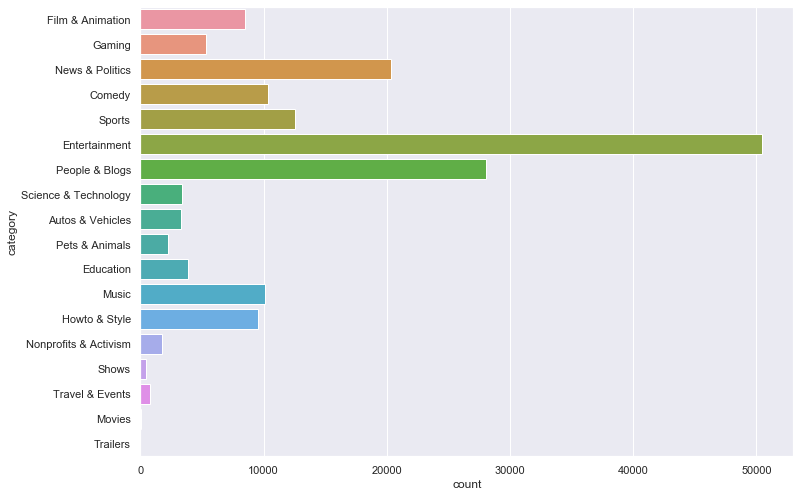

In [104]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(y = 'category', data = df)


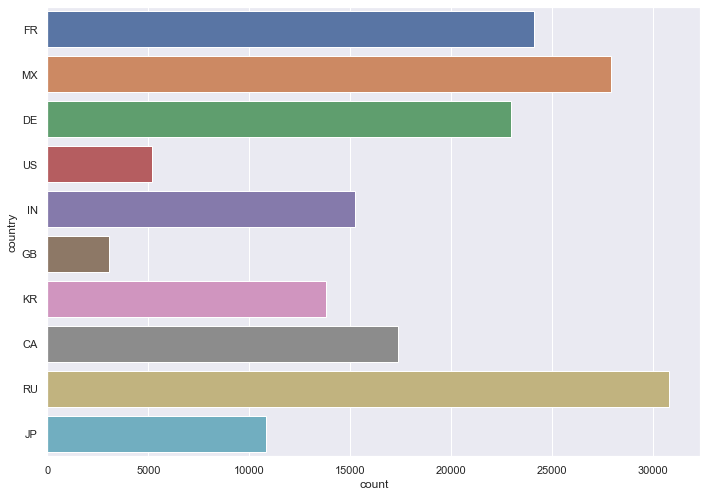

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(y = 'country', data = df)

In [1]:
sns.boxplot(y = "category", x = 'log_views', data = df)

NameError: name 'sns' is not defined

In [105]:
df[df['category'].isin(['Music'])]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp
46,Ti_hmTpucmI,2017-11-14,CE DJ AVEUGLE VA VOUS SURPRENDRE !!!,Felckin,10,Music,2017-11-12,16:59:40,"CE DJ AVEUGLE VA VOUS SURPRENDRE""|""DJ AVEUGLE""...",59376,4865,31,366,https://i.ytimg.com/vi/Ti_hmTpucmI/default.jpg,False,False,False,"J'ai rencontré Marty, un Dj aveugle incroyable...",FR,10.991662,8.490028,3.465736,5.905362,2017-11-12 16:59:40
110,tgjTYiowYZk,2017-11-14,JEREMSTAR - LA PEUR DE SA VIE - Marion et Anne-So,Marion et Anne-So,10,Music,2017-11-13,16:59:03,"Marion et Anne-So - Le Night Show""|""Le Night S...",5210,316,8,17,https://i.ytimg.com/vi/tgjTYiowYZk/default.jpg,False,False,False,On a joué a action ou verité avec Jeremstar et...,FR,8.558527,5.758902,2.197225,2.890372,2017-11-13 16:59:03
117,x-qhQespWm0,2017-11-14,DTOKE VS MKS | EL DOBLE TEMPO DE DTOKE | EL FI...,Detodoy rap,10,Music,2017-11-13,15:57:02,"BATALLA DE RAP|""RED BULL""|""BATALLA DE LOS GALL...",106497,7989,177,806,https://i.ytimg.com/vi/x-qhQespWm0/default.jpg,False,False,False,CLAN FEST (Torneo Internacional)→ https://goo....,MX,11.575881,8.985946,5.181784,6.693324,2017-11-13 15:57:02
135,Dt3i0xvLW_Q,2017-11-14,J Balvin - Pierde Los Modales (Bruuttal),jbalvinVEVO,10,Music,2017-11-13,10:00:00,"Balvin|""Pierde""|""Los""|""Modales""|""Eagle""|""Rock""...",63858,3065,102,136,https://i.ytimg.com/vi/Dt3i0xvLW_Q/default.jpg,False,False,False,"J. Balvin returns to his hometown of Medellín,...",MX,11.064433,8.028129,4.634729,4.919981,2017-11-13 10:00:00
136,8DLQNl20YE8,2017-11-14,HA ASH & CAMILA EXITOS Sus Mejores Canciones d...,Poppes Fitness & Music,10,Music,2017-11-13,14:17:01,"ha ash|""camila""|""Ha-Ash""|""camila discografia""|...",11042,70,10,1,https://i.ytimg.com/vi/8DLQNl20YE8/default.jpg,False,False,False,"Camila & Ha-Ash Exitos Romanticos, Sus mejores...",MX,9.309552,4.262680,2.397895,0.693147,2017-11-13 14:17:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171055,HS-5r9eyGIY,2018-06-14,Manta Lbi | ማንታ ልቢ - ተኻታታሊት ፊልም Part 1 New Eri...,Amen Entertainment,10,Music,2018-06-11,20:27:57,"Manta Lbi|""ማንታ ልቢ""|""ተኻታታሊት ፊልም""|""Eritrean New ...",139445,3527,463,525,https://i.ytimg.com/vi/HS-5r9eyGIY/default.jpg,False,False,False,Subscribe us https://bit.ly/2saq6nZ’’Eritrean ...,DE,11.845433,8.168486,6.139885,6.265301,2018-06-11 20:27:57
171071,WclDmFacc0c,2018-06-14,Música POP En Inglés 2018 - Música pop para tr...,Encanta Música,10,Music,2018-06-11,14:51:50,"Música|""POP""|""POP en Inglés""|""Música POP en In...",1288940,4818,537,175,https://i.ytimg.com/vi/WclDmFacc0c/default.jpg,False,False,False,Música POP En Inglés 2018 - Música pop para tr...,DE,14.069332,8.480322,6.287859,5.170484,2018-06-11 14:51:50
171098,DGzy8FE1Rhk,2018-06-14,Shawn Mendes - Nervous,ShawnMendesVEVO,10,Music,2018-06-11,16:00:03,"Shawn|""Mendes""|""Nervous""|""Island""|""Records""|""Pop""",4986664,518240,5215,34466,https://i.ytimg.com/vi/DGzy8FE1Rhk/default.jpg,False,False,False,Music video by Shawn Mendes performing Nervous...,DE,15.422278,13.158196,8.559486,10.447758,2018-06-11 16:00:03
171116,yEWb6bsd5lo,2018-06-14,Thirty Seconds To Mars - Rescue Me (Official M...,THIRTY SECONDS TO MARS,10,Music,2018-06-12,12:00:36,"New album|""Rescue Me""|""Thirty Seconds to Mars""...",2857908,37252,990,3263,https://i.ytimg.com/vi/yEWb6bsd5lo/default.jpg,False,False,False,Official Music Video | Thirty Seconds to Mars ...,DE,14.865601,10.525488,6.898715,8.090709,2018-06-12 12:00:36


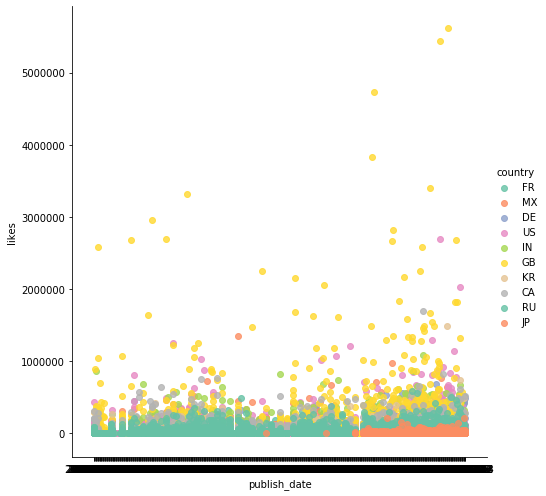

In [ ]:
sns.lineplot(x = 'date', y = 'likes' data = SU)

SyntaxError: invalid syntax (<ipython-input-21-c82a47831d43>, line 4)

In [50]:
max(df['year'])

KeyError: 'year'

In [111]:
OWa['game'] = 'OW'
OWa.shape

(161, 25)

In [112]:
OWa.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,game
0,eBBKwCAoShE,2017-11-14,아이폰8 2대 형 안쓰는데 가져갈사람있어!???,보겸 TV,24,Entertainment,2017-11-11,06:10:43,"클래시로얄;|""clash;""|""royale;""|""보겸;""|""보겸TV;""|""슈마상;""...",524465,62147,178,138193,https://i.ytimg.com/vi/eBBKwCAoShE/default.jpg,0,0,0,아이폰8 무료나눔 ^_^ 빼빼로데이 선물이야 ㅋㅋㅋ\n구독과 좋아요는 보겸에게 가장...,KR,13.170136,11.037274,5.187386,11.836414,2017-11-11 06:10:43.000000,OW
1,evGMWiEqTYM,2017-11-15,빈라덴 잡은 바로 그 총! 흥국HK416D 205만원 제일비싼 장난감총,보겸 TV,24,Entertainment,2017-11-14,10:30:19,"클래시로얄;|""clash;""|""royale;""|""보겸;""|""보겸TV;""|""슈마상;""...",317155,23144,145,3070,https://i.ytimg.com/vi/evGMWiEqTYM/default.jpg,0,0,0,보겸TV 유튜브 구독하기 :: https://goo.gl/08r0gG\n보겸TV의 ...,KR,12.667149,10.049534,4.983607,8.029759,2017-11-14 10:30:19.000000,OW
2,RBo7KpjFNU8,2017-11-15,"Une rencontre, une histoire - AlphaCast & Somb...",Potxeca,20,Gaming,2017-11-14,11:12:51,"alphacast""|""potxeca""|""alpha""|""overwatch""|""fr""|...",17198,1304,17,95,https://i.ytimg.com/vi/RBo7KpjFNU8/default.jpg,0,0,0,Petite fan fiction que j'avais créé pour Twitt...,FR,9.752607,7.173958,2.890372,4.564348,2017-11-14 11:12:51.000000,OW
3,WhLvS5GTK3E,2017-11-16,BlizzCon 2017 Opening Ceremony,Blizzard Entertainment,20,Gaming,2017-11-03,20:14:28,"Blizzard|""Blizzard Entertainment""|""Overwatch""|...",694643,9343,654,523,https://i.ytimg.com/vi/WhLvS5GTK3E/default.jpg,0,0,0,Join us at the Opening Ceremony of BlizzCon 20...,GB,13.451155,9.142490,6.484635,6.261492,2017-11-03 20:14:28.000000,OW
4,AHQOWzqJFew,2017-11-18,엄마미안해.. 애들아 형 외제차샀다,보겸 TV,20,Gaming,2017-11-15,11:07:26,"클래시로얄;|""clash;""|""royale;""|""보겸;""|""보겸TV;""|""슈마상;""...",696953,17796,264,4858,https://i.ytimg.com/vi/AHQOWzqJFew/default.jpg,0,0,0,NEED FOR SPEED : EDGE (니드포스피드 엣지)\n실제 슈퍼카 획득의 ...,KR,13.454475,9.786785,5.579730,8.488588,2017-11-15 11:07:26.000000,OW


In [141]:
q9 = "SELECT * FROM new  WHERE publish_date  BETWEEN '2017-11-3'  AND  '2017-11-30';"
test = ps.sqldf(q9,locals())
test

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,game
0,vzNcSvKCOyA,2017-12-03,Varus: As We Fall [OFFICIAL MUSIC VIDEO] | Lea...,League of Legends,20,Gaming,2017-11-30,15:21:18,"Riot Games|""Riot""|""League of Legends""|""League""...",2452418,99479,5240,12021,https://i.ytimg.com/vi/vzNcSvKCOyA/default.jpg,0,0,0,Witness the incarnation of vengeance. Part 2 o...,DE,14.712585,11.507712,8.564268,9.394494,2017-11-30 15:21:18.000000,LoL
1,cezJWjMTuDw,2017-12-02,아부지뭐하시노 전화바꿔라 5초준다,보겸 TV,24,Entertainment,2017-11-30,09:12:06,"클래시로얄;|""clash;""|""royale;""|""보겸;""|""보겸TV;""|""슈마상;""...",274722,6276,58,1362,https://i.ytimg.com/vi/cezJWjMTuDw/default.jpg,0,0,0,보겸TV 유튜브 구독하기 :: https://goo.gl/08r0gG\n보겸TV의 ...,KR,12.523519,8.744647,4.077537,7.217443,2017-11-30 09:12:06.000000,OW
2,rnwBsTzsHD0,2017-12-01,Держи в Курсе: Организаторы Мейджора Продают И...,RuHub Media,20,Gaming,2017-11-30,15:15:54,"dota|""киберспорт""|""esports""|""e-sports""|""2017""|...",46367,2092,124,104,https://i.ytimg.com/vi/rnwBsTzsHD0/default.jpg,0,0,0,В этом видео Иван Faker Демкин расскажет о нео...,RU,10.744365,7.646354,4.828314,4.653960,2017-11-30 15:15:54.000000,Dota2


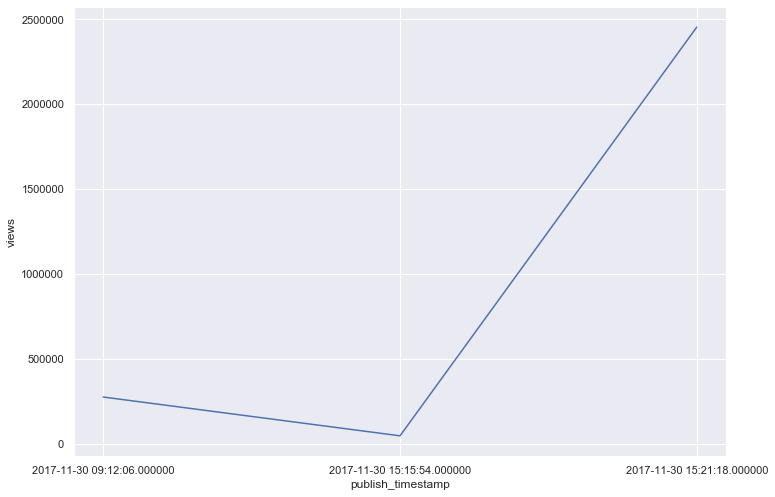

In [140]:
sns.lineplot(x="publish_timestamp", y = 'views', data=test)

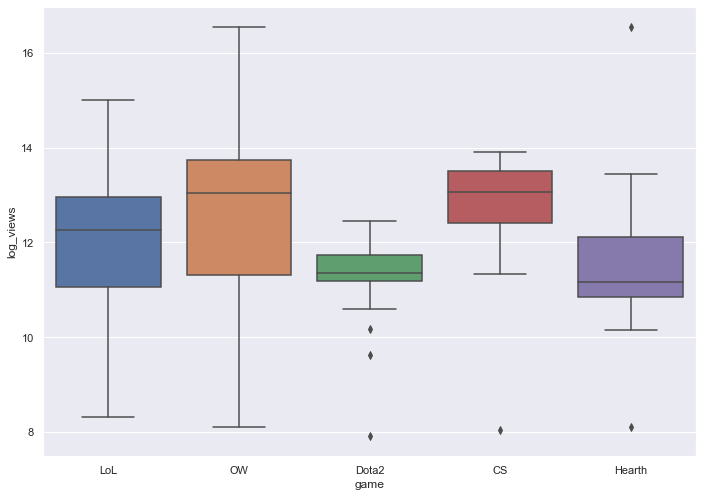

In [144]:
sns.boxplot(x = "game", y = 'log_views', data = new)